<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense
# from tensorflow.keras import Input
import matplotlib.pyplot as plt

In [22]:
# layer1 = Dense(units=15, activation="relu")
# layer2 = Dense(units = 10, activation="relu")
# layer3 = Dense(units= 10, activation="linear")

In [23]:
# model = Sequential([tf.keras.Input(shape=(400,)), layer1, layer2, layer3])

In [24]:
# model.compile(loss= SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"], optimizer= tf.keras.optimizers.Adam())

In [25]:
# import os
# os.environ["TF_NUM_INTEROP_THREADS"] = "12"  # Set to the number of CPU cores you have

<a name="2"></a>
## 2 - Neural Networks

In Course 1, you implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

<a name="2.2"></a>
### 2.2 Dataset


- The data set contains 5000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
X = np.load("X.npy")
# X= X[:1000, :]
y = np.load("y.npy")
# y= y[:1000, :]

In [3]:
# print ('The first element of X is: ', X[0])
print (f'The shape of X is: {X.shape}')
print (f'The shape of y is: {y.shape}')

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
arr = [1, 3, 4, 561, 56]

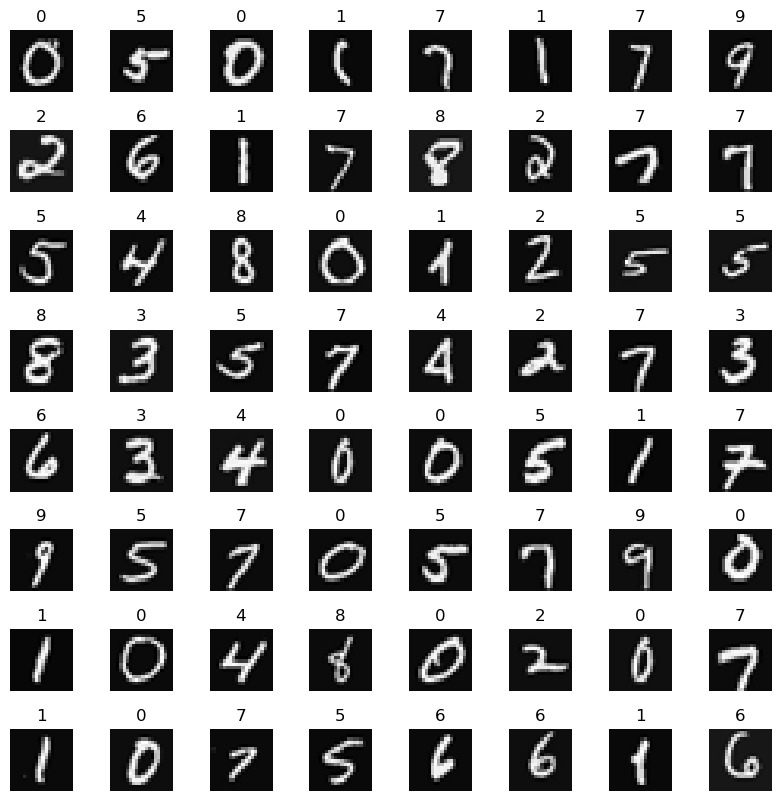

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape
# print(m, n)
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="C2_W1_Assign1.PNG" width="500" height="400">

In [5]:
# print(X_train.shape)
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        Dense(units=25, activation="relu", name='layer1'),
        Dense(units=15, activation="relu", name='layer2'),
        Dense(units=10, activation="sigmoid", name='xglayer3'),
    ], name = "my_model" 
)

model.compile(loss= SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"], optimizer= tf.keras.optimizers.Adam())

y_train = y_train.reshape(-1)
history =  model.fit(X_train, y_train, epochs = 40)

Epoch 1/40


C:\Users\singh\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3838 - loss: 1.9909
Epoch 2/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.7930
Epoch 3/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.4622
Epoch 4/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 0.3660
Epoch 5/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.3163
Epoch 6/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9313 - loss: 0.2530
Epoch 7/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9363 - loss: 0.2619
Epoch 8/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.2338
Epoch 9/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.2112
Epoch 10/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.1748
Epoch 11/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.1664
Epoch 12/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [6]:
y_pred = model(X_test)
print(y_pred[0])
y_label = np.argmax(y_pred, axis=1)
print(y_label[0])

tf.Tensor(
[5.9030513e-06 2.9881145e-05 2.9757331e-07 9.9996996e-01 2.6235911e-08
 2.5566715e-01 1.6111095e-11 2.0139746e-06 4.3182045e-02 6.7743860e-02], shape=(10,), dtype=float32)
3


Text(0, 0.5, 'loss')

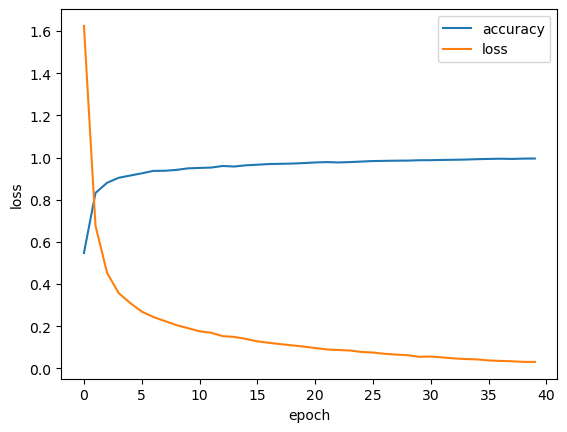

In [7]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.ylabel("loss")

125/125 [==============================] - 0s 2ms/step


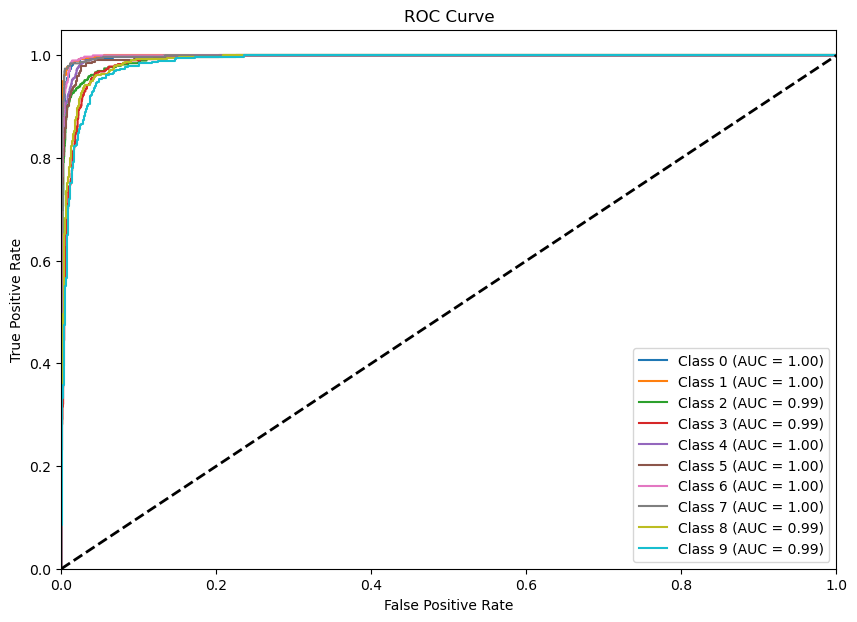

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Make predictions using your model
y_pred = model.predict(X_train)

# Step 2: Calculate the ROC curve for each class
n_classes = y_train.max() + 1  # Number of classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Compute ROC curve and ROC area for each class
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot the ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

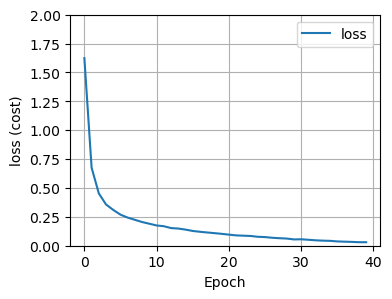

In [8]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

fig,ax = plt.subplots(1,1, figsize = (4,3))
widgvis(fig)
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_label)

0.926

C:\Users\singh\AppData\Local\Temp\ipykernel_19804\2868460247.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=0.1,rect=[0.1, 0.03, 1, 0]) #[left, bottom, right, top]


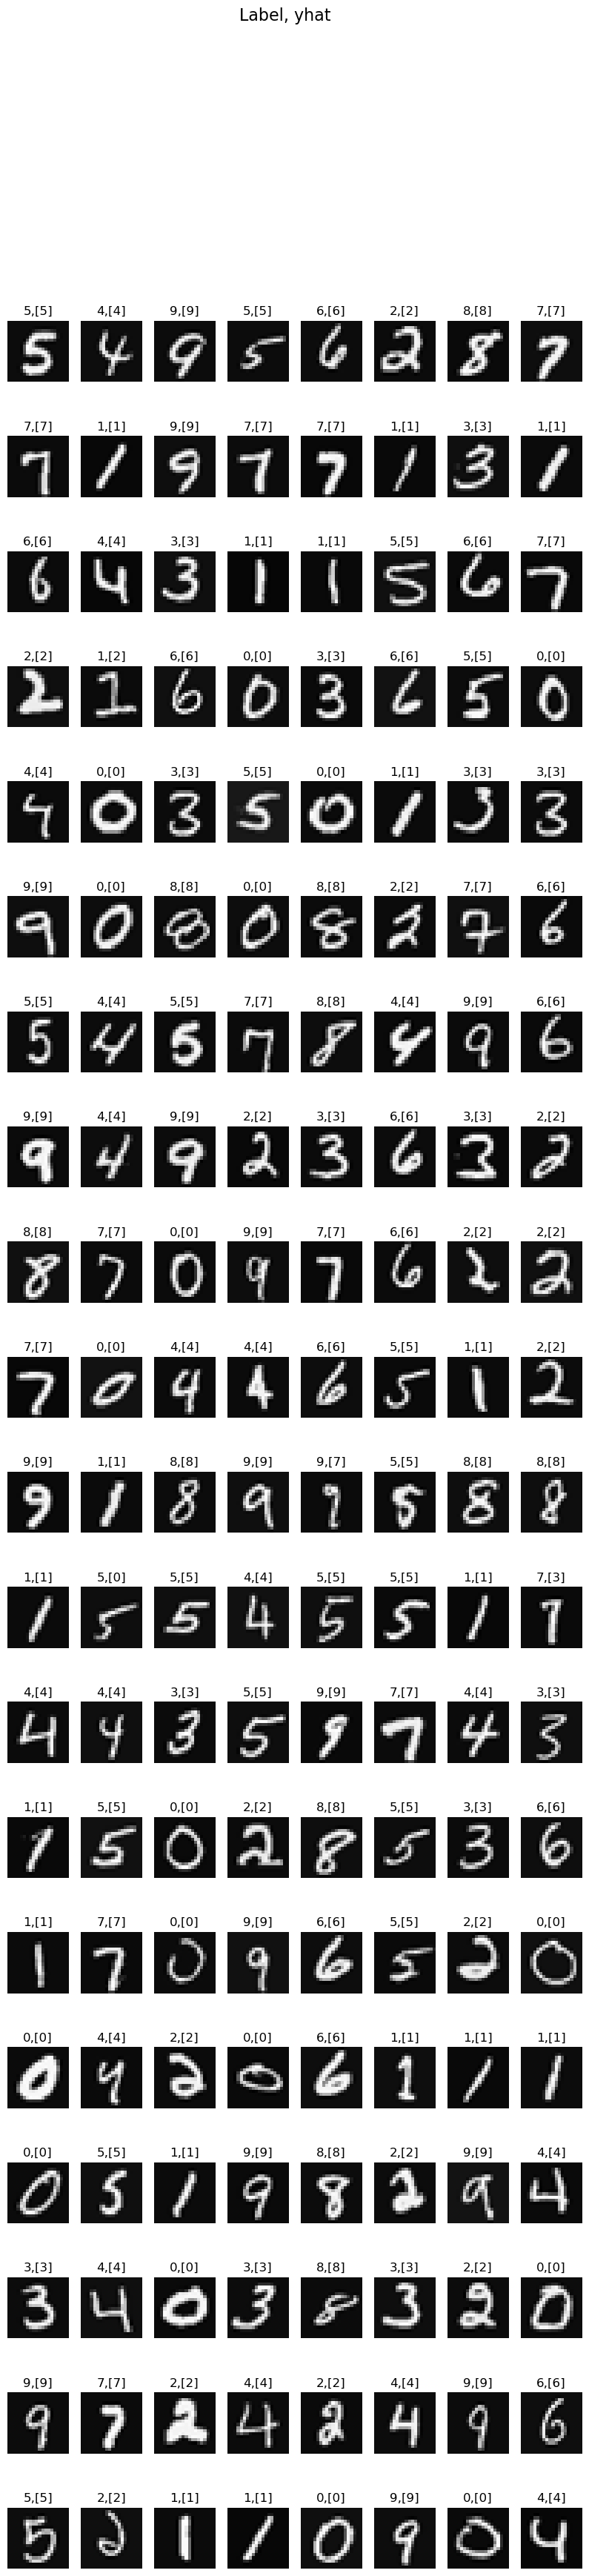

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(20,8, figsize=(10,40))
fig.tight_layout(pad=0.1,rect=[0.1, 0.03, 1, 0]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    prediction = model.predict(X[random_index].reshape(1,400), verbose=0)
    y_label = np.argmax(prediction, axis=1)
    ax.set_title(f"{y[random_index,0]},{y_label}")
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=16)
plt.savefig("output.png", format="pdf", bbox_inches="tight")

In [37]:
import warnings
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

# Create a PdfPages object to save figures to a PDF
pdf_pages = PdfPages("output.pdf")

# Set figure size in inches
fig_width = 8.27  # A4 width in inches
fig_height = 11.69  # A4 height in inches

# Calculate the n.lumber of rows and columns for each page
num_rows, num_cols = 8, 8  # 8x8 grid of images per page

m, n = X.shape

for i in range(0, 2000, num_rows * num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    
    
    for j in range(num_rows * num_cols):
        ax = axes[j // num_cols, j % num_cols]
        
        # Get the random index and reshape the image
        random_index = np.random.randint(m)
        X_random_reshaped = X[random_index].reshape((20, 20)).T
        
        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')
        
        # Predict using the Neural Network
        prediction = model.predict(X[random_index].reshape(1, 400), verbose=0)
        y_label = np.argmax(prediction, axis=1)
        
        # Display the label above the image
        ax.set_title(f"{y[random_index, 0]},{y_label}")
        ax.set_axis_off()

    # Add the current figure to the PDF
    pdf_pages.savefig(fig)
    plt.close(fig)

# Close the PDF file
pdf_pages.close()

In [35]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [68]:
print(X_test.shape)
print(y_test.shape)

(1000, 400)
(1000, 1)


77 errors out of 1000 images


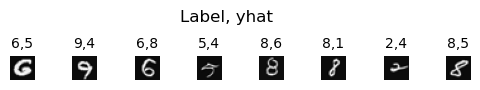

In [74]:
def display_errors(model,X,y):
    f = model.predict(X, verbose = 0)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400), verbose = 0)
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))
print( f"{display_errors(model,X_test,y_test)} errors out of {len(X_test)} images")

In [2]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.
